In [1]:
import gzip
import pandas as pd
import glob

# Get all .bed.gz files in the current directory
bed_files = sorted(glob.glob("*.bed.gz"))

# Function to read first 10 rows of a .bed.gz file
def read_bed_head(filepath, nrows=10):
    with gzip.open(filepath, 'rt') as f:
        df = pd.read_csv(f, sep='\t', header=None, nrows=nrows)
    return df

# Loop through files and print first 10 rows
for file in bed_files:
    print(f"\n📄 {file}")
    try:
        df = read_bed_head(file)
        print(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")



📄 A4885_DNA_01_X1_naive_S83_L004_mergecg.bed.gz
      0      1      2          3    4                    5
0   Chr  Start    End  Meth_frac  Cov                  C_G
1  chr1  10468  10470      0.000    3  C:0.000:1,G:0.000:2
2  chr1  10470  10472      0.000    2      C:.:0,G:0.000:2
3  chr1  10483  10485      0.000    2      C:.:0,G:0.000:2
4  chr1  10488  10490      0.000    2      C:.:0,G:0.000:2
5  chr1  10492  10494      0.000    2      C:.:0,G:0.000:2
6  chr1  10496  10498      0.000    2      C:.:0,G:0.000:2
7  chr1  10524  10526      0.000    2      C:.:0,G:0.000:2
8  chr1  10541  10543      0.000    2      C:.:0,G:0.000:2
9  chr1  10562  10564      0.000    2      C:.:0,G:0.000:2

📄 A4885_DNA_03_X7_reprimed_S84_L004_mergecg.bed.gz
      0      1      2          3    4                    5
0   Chr  Start    End  Meth_frac  Cov                  C_G
1  chr1  10468  10470      0.500    2  C:0.000:1,G:1.000:1
2  chr1  10470  10472      0.667    3  C:0.500:2,G:1.000:1
3  chr1  10483

In [2]:
df = pd.read_csv("combined_coverage_methylation_matrix.tsv", sep="\t")

In [3]:
print(df.head())


          Chr  Start  End  X2_S13_frac  X38_S14_frac  X56_S16_frac  \
0  GL000008.2    210  212        0.175         0.663         0.580   
1  GL000008.2    404  406        0.365         0.384         0.268   
2  GL000008.2    424  426        0.228         0.647         0.582   
3  GL000008.2    629  631        0.157         0.651         0.517   
4  GL000008.2    651  653          NaN         0.724         0.552   

   X5_S15_frac  X8_S17_frac  X2_S13_cov  X38_S14_cov  X56_S16_cov  X5_S15_cov  \
0        0.680        0.624       171.0        178.0        212.0       331.0   
1        0.312        0.353       192.0        190.0        194.0       272.0   
2        0.688        0.538       162.0        173.0        170.0       237.0   
3        0.692        0.554       134.0        295.0        356.0       543.0   
4        0.747        0.301         NaN        293.0        221.0       542.0   

   X8_S17_cov  
0       255.0  
1       241.0  
2       199.0  
3       395.0  
4       246.

In [4]:
import pandas as pd
import gzip
import glob
import os

# List your .bed.gz files manually or with glob
files = sorted(glob.glob("*.bed.gz"))

# Output dataframe initialized as None
merged_df = None

# Helper function to load and rename columns
def load_and_rename(filepath):
    sample = os.path.basename(filepath).replace("_mergecg.bed.gz", "")
    with gzip.open(filepath, 'rt') as f:
        df = pd.read_csv(f, sep='\t', comment='#', header=0,
                         names=["Chr", "Start", "End", f"{sample}_frac", f"{sample}_cov", "C_G"])
        df = df[["Chr", "Start", "End", f"{sample}_frac", f"{sample}_cov"]]
    return df

# Merge all dataframes on Chr, Start, End
for f in files:
    df = load_and_rename(f)
    if merged_df is None:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, on=["Chr", "Start", "End"], how="outer")

# Sort rows for easier reading
merged_df = merged_df.sort_values(by=["Chr", "Start", "End"]).reset_index(drop=True)

# Save or inspect
print(merged_df.head())

    Chr  Start    End  A4885_DNA_01_X1_naive_S83_L004_frac  \
0  chr1  10468  10470                                  0.0   
1  chr1  10470  10472                                  0.0   
2  chr1  10483  10485                                  0.0   
3  chr1  10488  10490                                  0.0   
4  chr1  10492  10494                                  0.0   

   A4885_DNA_01_X1_naive_S83_L004_cov  A4885_DNA_03_X7_reprimed_S84_L004_frac  \
0                                 3.0                                   0.500   
1                                 2.0                                   0.667   
2                                 2.0                                   0.667   
3                                 2.0                                   1.000   
4                                 2.0                                   0.333   

   A4885_DNA_03_X7_reprimed_S84_L004_cov  \
0                                    2.0   
1                                    3.0   
2       

In [1]:
merged_df.to_csv("merged_methylation_matrix_samples_2.csv", index=False)

NameError: name 'merged_df' is not defined

In [2]:
import pandas as pd

# Load the file
df = pd.read_csv('A4885_DNA_08_X6_primed_S87_L004_mergecg.bed.gz', 
                 sep='\t', 
                 header=None, 
                 compression='gzip')

# Preview the first few rows
print(df.head())

# See how many rows it has
print(f"Number of rows: {len(df)}")


      0      1      2      3  4                5
0  chr1  10468  10470  0.667  3  C:0.667:3,G:.:0
1  chr1  10470  10472  0.667  3  C:0.667:3,G:.:0
2  chr1  10483  10485  1.000  3  C:1.000:3,G:.:0
3  chr1  10488  10490  1.000  3  C:1.000:3,G:.:0
4  chr1  10492  10494  1.000  3  C:1.000:3,G:.:0
Number of rows: 27947376


In [3]:
df_old = pd.read_csv('merged_methylation_matrix_samples_2.csv')
print(df_old.columns)

Index(['Chr', 'Start', 'End', 'A4885_DNA_01_X1_naive_S83_L004_frac',
       'A4885_DNA_01_X1_naive_S83_L004_cov',
       'A4885_DNA_03_X7_reprimed_S84_L004_frac',
       'A4885_DNA_03_X7_reprimed_S84_L004_cov',
       'A4885_DNA_04_X33_POMC_d26_primed_S85_L004_frac',
       'A4885_DNA_04_X33_POMC_d26_primed_S85_L004_cov',
       'A4885_DNA_06_X57_POMC_d26_reprimed_S86_L004_frac',
       'A4885_DNA_06_X57_POMC_d26_reprimed_S86_L004_cov',
       'A4885_DNA_08_X6_primed_S87_L004_frac',
       'A4885_DNA_08_X6_primed_S87_L004_cov'],
      dtype='object')


In [4]:
columns_to_drop = ['A4885_DNA_08_X6_primed_S87_L004_frac', 'A4885_DNA_08_X6_primed_S87_L004_cov']
df_old_filtered = df_old.drop(columns=columns_to_drop)

In [5]:
print(df_old.columns)

Index(['Chr', 'Start', 'End', 'A4885_DNA_01_X1_naive_S83_L004_frac',
       'A4885_DNA_01_X1_naive_S83_L004_cov',
       'A4885_DNA_03_X7_reprimed_S84_L004_frac',
       'A4885_DNA_03_X7_reprimed_S84_L004_cov',
       'A4885_DNA_04_X33_POMC_d26_primed_S85_L004_frac',
       'A4885_DNA_04_X33_POMC_d26_primed_S85_L004_cov',
       'A4885_DNA_06_X57_POMC_d26_reprimed_S86_L004_frac',
       'A4885_DNA_06_X57_POMC_d26_reprimed_S86_L004_cov',
       'A4885_DNA_08_X6_primed_S87_L004_frac',
       'A4885_DNA_08_X6_primed_S87_L004_cov'],
      dtype='object')


In [6]:
sample_id = 'A4885_DNA_08_X6_primed_S87_L004'

df.columns = ['Chr', 'Start', 'End',
              f'{sample_id}_frac',
              f'{sample_id}_cov',
              f'{sample_id}_context']

In [7]:
df = df.drop(columns=[f'{sample_id}_context'])

In [8]:
print(df.columns)

Index(['Chr', 'Start', 'End', 'A4885_DNA_08_X6_primed_S87_L004_frac',
       'A4885_DNA_08_X6_primed_S87_L004_cov'],
      dtype='object')


In [9]:
# Select only the relevant columns from the new df
df_new_selected = df[['Chr', 'Start', 'End',
                      'A4885_DNA_08_X6_primed_S87_L004_frac',
                      'A4885_DNA_08_X6_primed_S87_L004_cov']]

# Merge with the existing dataframe
merged_df = pd.merge(df_old_filtered, df_new_selected,
                     on=['Chr', 'Start', 'End'],
                     how='outer')  # 'outer' keeps all sites; use 'inner' for intersection only

In [10]:
print(df_new_selected.isnull().sum())

Chr                                     0
Start                                   0
End                                     0
A4885_DNA_08_X6_primed_S87_L004_frac    0
A4885_DNA_08_X6_primed_S87_L004_cov     0
dtype: int64


In [11]:
cov_col = [col for col in df_new_selected.columns if col.endswith('_cov')][0]
print(df_new_selected[cov_col].describe())

count    2.794738e+07
mean     2.397828e+01
std      6.695100e+01
min      1.000000e+00
25%      1.500000e+01
50%      2.300000e+01
75%      3.100000e+01
max      6.158900e+04
Name: A4885_DNA_08_X6_primed_S87_L004_cov, dtype: float64


In [12]:
dup_coords = df_new_selected.duplicated(subset=['Chr', 'Start', 'End']).sum()
print(f"Duplicated coordinates: {dup_coords}")

Duplicated coordinates: 0


In [15]:
chrX_df = merged_df[merged_df['Chr'] == 'chrX']

In [16]:
print(chrX_df.head())         # First 5 rows
print(chrX_df.sample(5))      # Random 5 rows

           Chr  Start    End  A4885_DNA_01_X1_naive_S83_L004_frac  \
26879641  chrX  10152  10154                                  NaN   
26879642  chrX  10232  10234                                  NaN   
26879643  chrX  10330  10332                                  NaN   
26879644  chrX  10334  10336                                  NaN   
26879645  chrX  10336  10338                                  NaN   

          A4885_DNA_01_X1_naive_S83_L004_cov  \
26879641                                 NaN   
26879642                                 NaN   
26879643                                 NaN   
26879644                                 NaN   
26879645                                 NaN   

          A4885_DNA_03_X7_reprimed_S84_L004_frac  \
26879641                                     NaN   
26879642                                     1.0   
26879643                                     1.0   
26879644                                     1.0   
26879645                            

In [13]:
print(merged_df.shape)
print(merged_df.columns)


(28208733, 13)
Index(['Chr', 'Start', 'End', 'A4885_DNA_01_X1_naive_S83_L004_frac',
       'A4885_DNA_01_X1_naive_S83_L004_cov',
       'A4885_DNA_03_X7_reprimed_S84_L004_frac',
       'A4885_DNA_03_X7_reprimed_S84_L004_cov',
       'A4885_DNA_04_X33_POMC_d26_primed_S85_L004_frac',
       'A4885_DNA_04_X33_POMC_d26_primed_S85_L004_cov',
       'A4885_DNA_06_X57_POMC_d26_reprimed_S86_L004_frac',
       'A4885_DNA_06_X57_POMC_d26_reprimed_S86_L004_cov',
       'A4885_DNA_08_X6_primed_S87_L004_frac',
       'A4885_DNA_08_X6_primed_S87_L004_cov'],
      dtype='object')


In [14]:
missing_counts = merged_df.isnull().sum()
print(missing_counts[missing_counts > 0])

A4885_DNA_01_X1_naive_S83_L004_frac                 366389
A4885_DNA_01_X1_naive_S83_L004_cov                  366389
A4885_DNA_03_X7_reprimed_S84_L004_frac              332511
A4885_DNA_03_X7_reprimed_S84_L004_cov               332511
A4885_DNA_04_X33_POMC_d26_primed_S85_L004_frac      261738
A4885_DNA_04_X33_POMC_d26_primed_S85_L004_cov       261738
A4885_DNA_06_X57_POMC_d26_reprimed_S86_L004_frac    267561
A4885_DNA_06_X57_POMC_d26_reprimed_S86_L004_cov     267561
A4885_DNA_08_X6_primed_S87_L004_frac                261357
A4885_DNA_08_X6_primed_S87_L004_cov                 261357
dtype: int64


In [15]:
dupes = merged_df.duplicated(subset=['Chr', 'Start', 'End']).sum()
print(f"Duplicated coordinate rows: {dupes}")

Duplicated coordinate rows: 0


In [16]:
print(merged_df.columns)

Index(['Chr', 'Start', 'End', 'A4885_DNA_01_X1_naive_S83_L004_frac',
       'A4885_DNA_01_X1_naive_S83_L004_cov',
       'A4885_DNA_03_X7_reprimed_S84_L004_frac',
       'A4885_DNA_03_X7_reprimed_S84_L004_cov',
       'A4885_DNA_04_X33_POMC_d26_primed_S85_L004_frac',
       'A4885_DNA_04_X33_POMC_d26_primed_S85_L004_cov',
       'A4885_DNA_06_X57_POMC_d26_reprimed_S86_L004_frac',
       'A4885_DNA_06_X57_POMC_d26_reprimed_S86_L004_cov',
       'A4885_DNA_08_X6_primed_S87_L004_frac',
       'A4885_DNA_08_X6_primed_S87_L004_cov'],
      dtype='object')


In [17]:
merged_df.rename(columns={
    'A4885_DNA_01_X1_naive_S83_L004_frac': 'Naive_2_frac',
    'A4885_DNA_01_X1_naive_S83_L004_cov': 'Naive_2_cov',
    'A4885_DNA_03_X7_reprimed_S84_L004_frac': 'Formative_2_frac',
    'A4885_DNA_03_X7_reprimed_S84_L004_cov': 'Formative_2_cov',
    'A4885_DNA_04_X33_POMC_d26_primed_S85_L004_frac': 'Primed_Neuron_2_frac',
    'A4885_DNA_04_X33_POMC_d26_primed_S85_L004_cov': 'Primed_Neuron_2_cov',
    'A4885_DNA_06_X57_POMC_d26_reprimed_S86_L004_frac': 'Formative_Neuron_2_frac',
    'A4885_DNA_06_X57_POMC_d26_reprimed_S86_L004_cov': 'Formative_Neuron_2_cov',
    'A4885_DNA_08_X6_primed_S87_L004_frac': 'Primed_2_frac',
    'A4885_DNA_08_X6_primed_S87_L004_cov': 'Primed_2_cov'
    # add more if needed
}, inplace=True)

In [30]:
desired_order = [
    'Chr', 'Start', 'End',
    'Naive_2_frac', 'Naive_2_cov',
    'Formative_2_frac', 'Formative_2_cov',
    'Primed_2_frac', 'Primed_2_cov',
    'Formative_Neuron_2_frac', 'Formative_Neuron_2_cov',
    'Primed_Neuron_2_frac', 'Primed_Neuron_2_cov',
]

# Reorder columns
merged_df = merged_df[desired_order]

In [31]:
print(merged_df.columns)

Index(['Chr', 'Start', 'End', 'Naive_2_frac', 'Naive_2_cov',
       'Formative_2_frac', 'Formative_2_cov', 'Primed_2_frac', 'Primed_2_cov',
       'Formative_Neuron_2_frac', 'Formative_Neuron_2_cov',
       'Primed_Neuron_2_frac', 'Primed_Neuron_2_cov'],
      dtype='object')


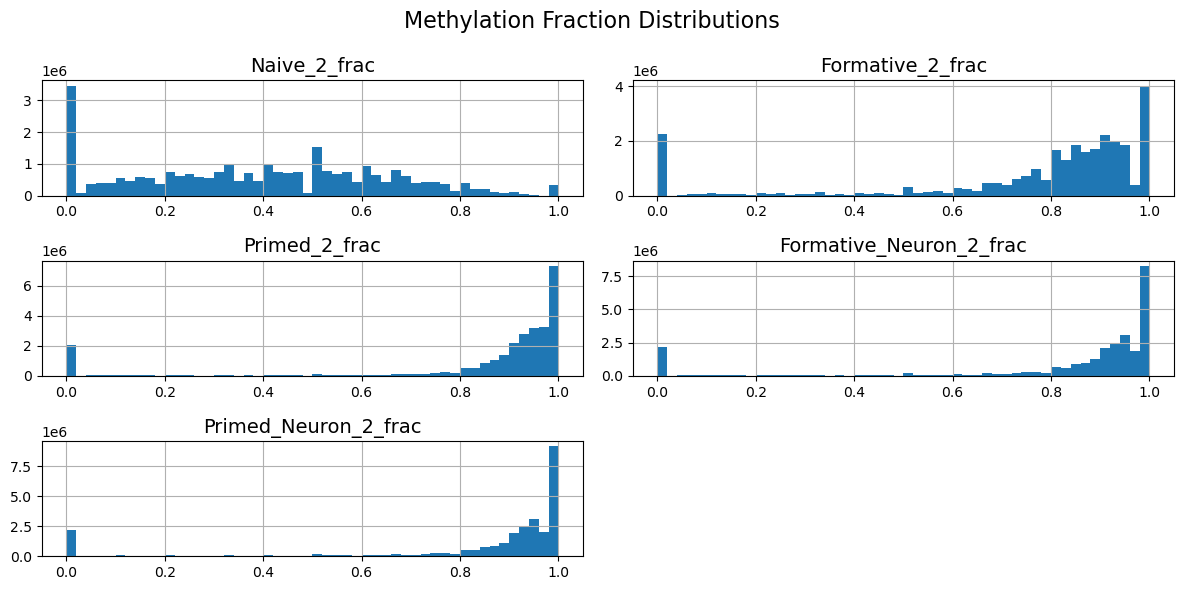

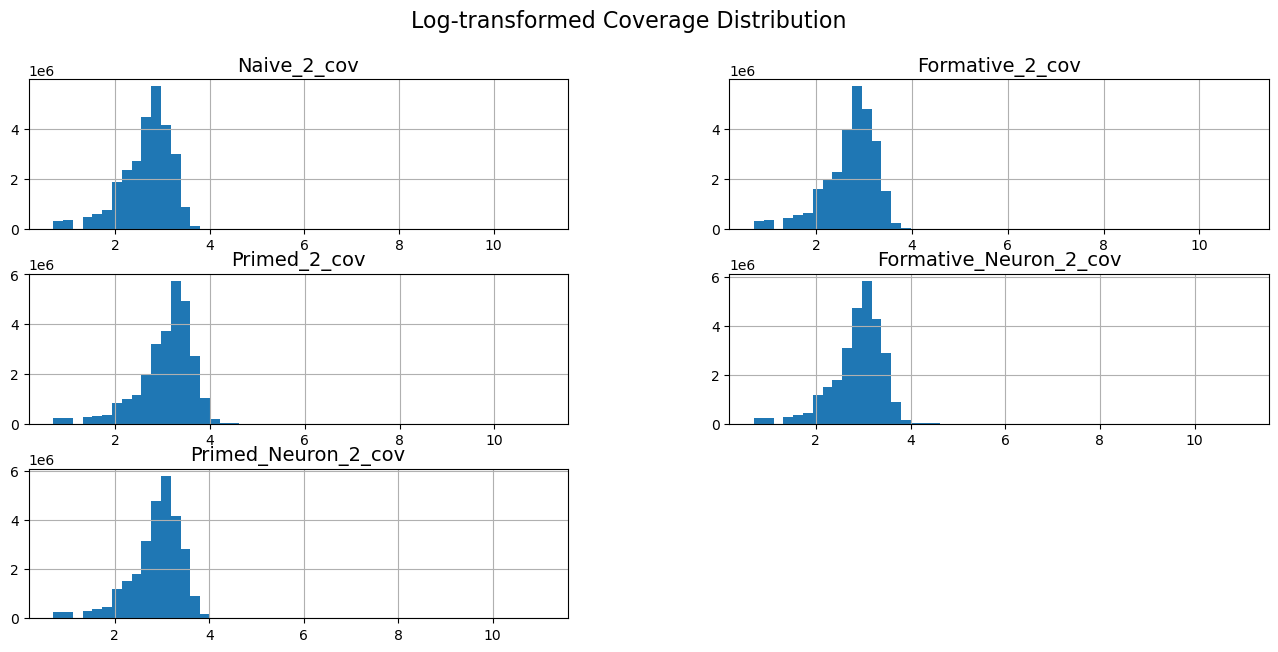

In [35]:
import matplotlib.pyplot as plt

frac_cols = [col for col in merged_df.columns if col.endswith('_frac')]
cov_cols = [col for col in merged_df.columns if col.endswith('_cov')]

plt.rcParams.update({
    'font.size': 12,           # default font size
    'axes.titlesize': 14,      # subplot titles
    'axes.labelsize': 12,      # x and y labels
    'xtick.labelsize': 10,     # tick labels
    'ytick.labelsize': 10,
    'legend.fontsize': 11,
    'figure.titlesize': 16     # suptitle
})

merged_df[frac_cols].hist(bins=50, figsize=(12, 6))
plt.suptitle("Methylation Fraction Distributions")
plt.tight_layout()
plt.savefig("samples_2_methylation_distribution.pdf", format='pdf', bbox_inches='tight')
plt.savefig("samples_2_methylation_distribution.svg", format='svg', bbox_inches='tight')
plt.show()

import numpy as np

log_cov = np.log1p(merged_df[cov_cols])  # log(coverage + 1)
ax = log_cov.hist(bins=50, figsize=(16, 7))
plt.suptitle("Log-transformed Coverage Distribution")
plt.savefig("samples_2_coverage_distribution_zoomed.svg", format='svg', bbox_inches='tight')
plt.savefig("samples_2_coverage_distribution_zoomed.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [33]:
merged_df.to_csv("samples_2_matrix.csv", index=False)

In [20]:
first = pd.read_csv('combined_coverage_methylation_matrix.tsv', sep='\t')

In [21]:
print(first.columns)

Index(['Chr', 'Start', 'End', 'X2_S13_frac', 'X38_S14_frac', 'X56_S16_frac',
       'X5_S15_frac', 'X8_S17_frac', 'X2_S13_cov', 'X38_S14_cov',
       'X56_S16_cov', 'X5_S15_cov', 'X8_S17_cov'],
      dtype='object')


In [22]:
first.rename(columns={
    'X2_S13_frac': 'Naive_1_frac',
    'X2_S13_cov': 'Naive_1_cov',
    'X8_S17_frac': 'Formative_1_frac',
    'X8_S17_cov': 'Formative_1_cov',
    'X38_S14_frac': 'Primed_Neuron_1_frac',
    'X38_S14_cov': 'Primed_Neuron_1_cov',
    'X56_S16_frac': 'Formative_Neuron_1_frac',
    'X56_S16_cov': 'Formative_Neuron_1_cov',
    'X5_S15_frac': 'Primed_1_frac',
    'X5_S15_cov': 'Primed_1_cov'
    # add more if needed
}, inplace=True)

In [28]:
desired_order = [
    'Chr', 'Start', 'End',
    'Naive_1_frac', 'Naive_1_cov',
    'Formative_1_frac', 'Formative_1_cov',
    'Primed_1_frac', 'Primed_1_cov',
    'Formative_Neuron_1_frac', 'Formative_Neuron_1_cov',
    'Primed_Neuron_1_frac', 'Primed_Neuron_1_cov',
]

# Reorder columns
first = first[desired_order]

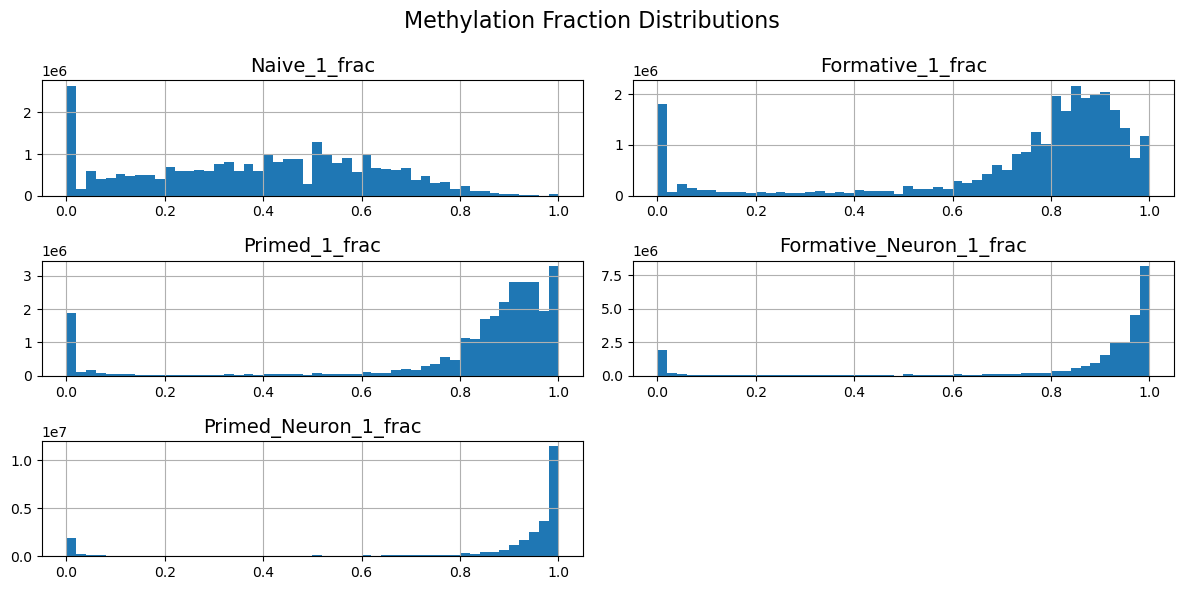

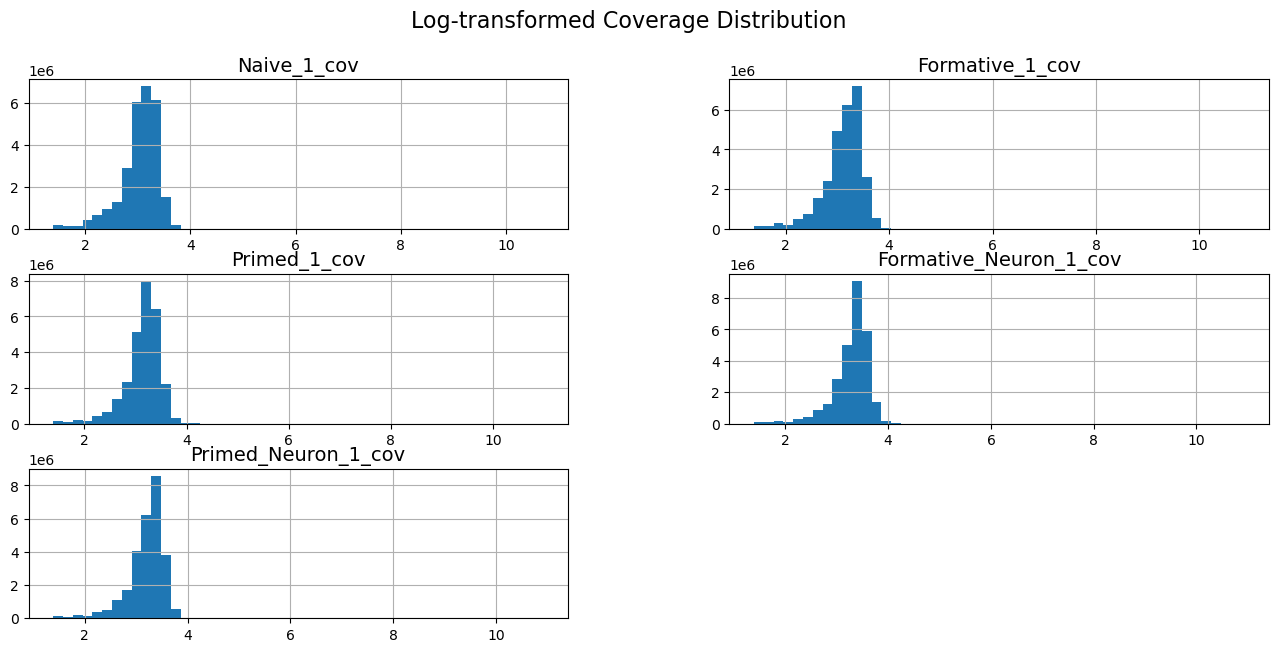

In [36]:
frac_cols = [col for col in first.columns if col.endswith('_frac')]
cov_cols = [col for col in first.columns if col.endswith('_cov')]

plt.rcParams.update({
    'font.size': 12,           # default font size
    'axes.titlesize': 14,      # subplot titles
    'axes.labelsize': 12,      # x and y labels
    'xtick.labelsize': 10,     # tick labels
    'ytick.labelsize': 10,
    'legend.fontsize': 11,
    'figure.titlesize': 16     # suptitle
})

first[frac_cols].hist(bins=50, figsize=(12, 6))
plt.suptitle("Methylation Fraction Distributions")
plt.tight_layout()
plt.savefig("samples_1_methylation_distribution.pdf", format='pdf', bbox_inches='tight')
plt.savefig("samples_1_methylation_distribution.svg", format='svg', bbox_inches='tight')
plt.show()

log_cov = np.log1p(first[cov_cols])  # log(coverage + 1)
ax = log_cov.hist(bins=50, figsize=(16, 7))
plt.suptitle("Log-transformed Coverage Distribution")
plt.savefig("samples_1_coverage_distribution_zoomed.pdf", format='pdf', bbox_inches='tight')
plt.savefig("samples_1_coverage_distribution_zoomed.svg", format='svg', bbox_inches='tight')
plt.show()

In [34]:
first.to_csv("samples_1_matrix.csv", index=False)

In [2]:
import pandas as pd
df = pd.read_csv("meth_matrix_10_samples.csv", sep=",")

In [3]:
print(df.head(20))

    Chromosome  Start   End  Naive_1_frac  Naive_1_cov  Formative_1_frac  \
0   GL000008.2    210   212         0.175        171.0             0.624   
1   GL000008.2    404   406         0.365        192.0             0.353   
2   GL000008.2    424   426         0.228        162.0             0.538   
3   GL000008.2    629   631         0.157        134.0             0.554   
4   GL000008.2    651   653           NaN          NaN             0.301   
5   GL000008.2    664   666         0.083        132.0             0.470   
6   GL000008.2    854   856           NaN          NaN               NaN   
7   GL000008.2    906   908         0.061        131.0             0.489   
8   GL000008.2   1399  1401           NaN          NaN             0.698   
9   GL000008.2   1515  1517         0.053        169.0             0.316   
10  GL000008.2   1563  1565         0.160        282.0             0.719   
11  GL000008.2   1602  1604         0.059        119.0               NaN   
12  GL000008